In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.append("../src/")
import json

import numpy as np
import pandas as pd
import math
from datasets import Dataset, list_metrics, load_metric
from transformers import AutoConfig, AutoTokenizer, AutoModelForMaskedLM, DataCollatorForLanguageModeling, Trainer

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from results_analysis.analyze_exp_results import ExpAnalyzer

In [3]:
base_result_dir = "/data/ddmg/redditlanguagemodeling/results/"

In [7]:
16423 / (60*60)

4.561944444444444

# Summary of Findings

## BERT

Resources:
* Memory for storing pre-trained model: 421 MB
* Memory for storing fine-tuned model + checkpoint: 1.7 GB
* Train time: 25987 s = 7.23 hours (fine-tuned)
* Eval time: 117 s (pre-trained); 110s (fine-tuned)
* Test time: 121 s (pre-trained); 121s (fine-tuned)

Performance:
* Eval perplexity: 14.7 (pre-trained); 4.88 (fine-tuned)
* Test perplexity: 15.2 (pre-trained); 5.05 (fine-tuned)
* Test perplexity per subreddit: 14.74 +/- 3.1 (pre-trained); 4.92 +/- 1.2 (fine-tuned)
* Test perplexity per author: 18.8 +/- 13.3 (pre-trained); 6.56 +/- 3.9 (fine-tuned)


## DistilBERT

Resources:
* Memory for storing pre-trained model: 257 MB
* Memory for storing pre-trained model + checkpoint: 1 GB
* Train time: 16423 s = 4.6 hours (fine-tuned)
* Eval time: 78 s (pre-trained); 78 s (fine-tuned)
* Test time: 78 s (pre-trained); 86 s

Performance:
* Eval perplexity: 19.21 (pre-trained); 5.97 (fine-tuned)
* Test perpleity: 19.6 (pre-trained); 6.07 (fine-tuned)
* Test perplexity per subreddit: 18.09 +/- 3.9 (pre-trained)
* Test perplexity per author: 23.0 +/- 14.2 (pre-trained)

# Pre-Trained - No Fine-tuning

## BERT

In [11]:
result_dir1 = os.path.join(base_result_dir, "1_bert_pretrained")

In [12]:
exp_analyzer1 = ExpAnalyzer(result_dir1)

In [8]:
exp_analyzer1.eval_results

{'eval_loss': 2.6916542053222656,
 'eval_perplexity': 14.75606530411862,
 'eval_runtime': 117.3563,
 'eval_samples': 7226,
 'eval_samples_per_second': 61.573}

In [9]:
exp_analyzer1.test_results

{'test_loss': 2.7215564250946045,
 'test_perplexity': 15.203967675837784,
 'test_runtime': 120.5769,
 'test_samples': 7884,
 'test_samples_per_second': 65.386}

In [10]:
exp_analyzer1.sr_result_df

,subreddit,loss,perplexity
0,AskDocs,2.801101,16.462758
1,Bitcoin,2.726657,15.281713
2,family,2.453645,11.630666
3,investing,2.748518,15.619470
4,medical,3.063607,21.404629
5,mentalhealth,2.660845,14.308375
6,personalfinance,2.540106,12.681016
7,relationship_advice,2.670200,14.442859
8,relationships,2.385309,10.862418


In [13]:
print("mean")
print(exp_analyzer1.sr_result_df.mean())
print("\nstd")
print(exp_analyzer1.sr_result_df.std())

mean
loss           2.672221
perplexity    14.743767
dtype: float64

std
loss          0.201947
perplexity    3.115878
dtype: float64


In [14]:
print("mean")
print(exp_analyzer1.author_result_df.mean())
print("\nstd")
print(exp_analyzer1.author_result_df.std())

mean
loss           2.762923
perplexity    18.802296
dtype: float64

std
loss           0.564246
perplexity    13.278986
dtype: float64


## DistillBERT

In [4]:
result_dir2 = os.path.join(base_result_dir, "5_bert_distill_pretrained")

In [5]:
exp_analyzer2 = ExpAnalyzer(result_dir2)

In [6]:
exp_analyzer2.eval_results

{'eval_loss': 2.955687999725342,
 'eval_perplexity': 19.21493804533937,
 'eval_runtime': 77.6626,
 'eval_samples': 7226,
 'eval_samples_per_second': 93.043,
 'eval_time': 77.66602063179016}

In [7]:
exp_analyzer2.test_results

{'test_loss': 2.9753170013427734,
 'test_perplexity': 19.595834170853717,
 'test_runtime': 78.5409,
 'test_samples': 7884,
 'test_samples_per_second': 100.381,
 'test_time': 78.54447793960571}

In [8]:
exp_analyzer2.sr_result_df

,subreddit,loss,perplexity
0,AskDocs,2.937643,18.871315
1,Bitcoin,3.082758,21.818494
2,family,2.550174,12.809329
3,investing,3.011620,20.320298
4,medical,3.222146,25.081877
5,mentalhealth,2.685069,14.659207
6,personalfinance,2.923666,18.609393
7,relationship_advice,2.775740,16.050502
8,relationships,2.683210,14.631989


In [9]:
print("mean")
print(exp_analyzer2.sr_result_df.mean())
print("\nstd")
print(exp_analyzer2.sr_result_df.std())

mean
loss           2.874670
perplexity    18.094712
dtype: float64

std
loss          0.217040
perplexity    3.943594
dtype: float64


In [10]:
print("mean")
print(exp_analyzer2.author_result_df.mean())
print("\nstd")
print(exp_analyzer2.author_result_df.std())

mean
loss           3.007019
perplexity    22.996273
dtype: float64

std
loss           0.481862
perplexity    14.204621
dtype: float64


### Compare plots

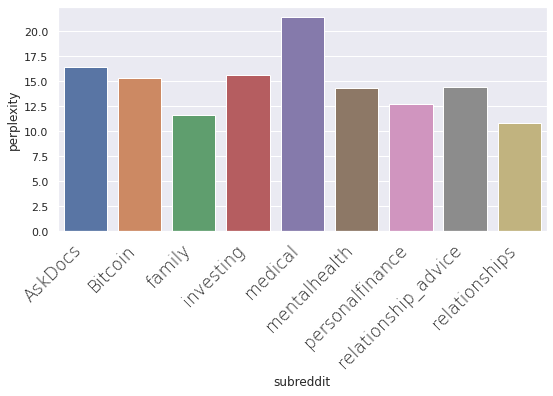

<Figure size 432x288 with 0 Axes>

In [13]:
exp_analyzer1.plot_perf_by_subreddit("perplexity")

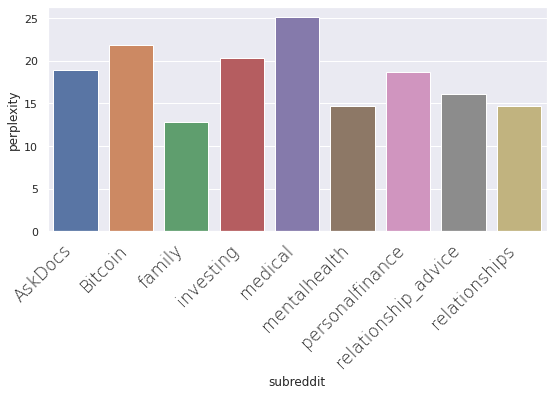

<Figure size 432x288 with 0 Axes>

In [14]:
exp_analyzer2.plot_perf_by_subreddit("perplexity")

## With fine-tuning

## BERT

In [4]:
result_dir3 = os.path.join(base_result_dir, "2_bert_finetuned_all")

In [5]:
exp_analyzer3 = ExpAnalyzer(result_dir3)

In [6]:
exp_analyzer3.trainer_state['log_history'][-1]['train_runtime']

25986.8873

In [18]:
exp_analyzer3.eval_results

{'epoch': 0.46,
 'eval_loss': 1.5852924585342407,
 'eval_perplexity': 4.8807185776055295,
 'eval_runtime': 109.687,
 'eval_samples': 7226,
 'eval_samples_per_second': 65.878}

In [19]:
exp_analyzer3.test_results

{'epoch': 0.46,
 'test_loss': 1.619855284690857,
 'test_perplexity': 5.0523591099462495,
 'test_runtime': 120.7802,
 'test_samples': 7884,
 'test_samples_per_second': 65.276}

In [20]:
exp_analyzer3.sr_result_df

,subreddit,loss,perplexity
0,AskDocs,1.520442,4.574244
1,Bitcoin,1.847334,6.342889
2,family,1.488848,4.431989
3,investing,1.341149,3.823435
4,medical,2.003002,7.411274
5,mentalhealth,1.569690,4.805158
6,personalfinance,1.631887,5.113514
7,relationship_advice,1.395025,4.035074
8,relationships,1.329563,3.779390


In [21]:
print("mean")
print(exp_analyzer3.sr_result_df.mean())
print("\nstd")
print(exp_analyzer3.sr_result_df.std())

mean
loss          1.569660
perplexity    4.924108
dtype: float64

std
loss          0.228603
perplexity    1.220952
dtype: float64


In [22]:
print("mean")
print(exp_analyzer3.author_result_df.mean())
print("\nstd")
print(exp_analyzer3.author_result_df.std())

mean
loss          1.758243
perplexity    6.563281
dtype: float64

std
loss          0.472632
perplexity    3.925941
dtype: float64


## DistilBERT

In [4]:
result_dir4 = os.path.join(base_result_dir, "6_distilbert_finetuned_all")

In [5]:
exp_analyzer4 = ExpAnalyzer(result_dir4)

In [6]:
exp_analyzer4.trainer_state['log_history'][-1]['train_runtime']

16423.2723

In [8]:
exp_analyzer4.eval_results

{'epoch': 0.43,
 'eval_loss': 1.7871166467666626,
 'eval_perplexity': 5.97220763266917,
 'eval_runtime': 78.6082,
 'eval_samples': 7226,
 'eval_samples_per_second': 91.924,
 'eval_time': 78.61141443252563}

In [9]:
exp_analyzer4.test_results

{'epoch': 0.43,
 'test_loss': 1.8038398027420044,
 'test_perplexity': 6.072921572731149,
 'test_runtime': 85.8863,
 'test_samples': 7884,
 'test_samples_per_second': 91.796,
 'test_time': 85.88980984687805}